# DISCOVER-AQ Maryland (2011)

<img src="disco/flighttrack.png">
Source: NASA LaRC (2017)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%pylab inline

matplotlib.rcParams.update({'font.size': 16})

Populating the interactive namespace from numpy and matplotlib


## Retrieve GEOS-Chem data along flighttracks

GC output: Tracers past 67 are not assigned.

In [2]:
cpdc = {'NOx': 'TRA_068', 'PAN': 'TRA_003', 'HNO3': 'TRA_007', \
        'R4N2': 'TRA_017', 'NH3': 'TRA_030', 'O3': 'TRA_002', \
        'CO': 'TRA_004', 'H2O2': 'TRA_008', 'SO2': 'TRA_026', \
        'NOy': 'NOy'}

In [3]:
dates = np.arange(20110701, 20110730)

plog = 'Planeflight.log.'
dat = pd.read_csv('../../planeflights/' + plog + str(dates[0]), sep='\s*', engine='python')
dsc_mon = dat[dat["TYPE"]=='DISCO']

for dt in dates:
    day_dat = 0
    dsc_day = 0
    day_dat = pd.read_csv('../../planeflights/' + plog + str(dt), sep='\s*', engine='python')
    dsc_day = day_dat[day_dat["TYPE"]=="DISCO"]
    dsc_mon = pd.concat([dsc_mon, dsc_day])

dsc_mon['TRA_068'] = dsc_mon['TRA_001'] + dsc_mon['TRA_064'] # NOx

In [4]:
list(dsc_mon)

['GMAO_ABSH',
 'GMAO_NDENS',
 'GMAO_PSFC',
 'GMAO_SURF',
 'GMAO_TEMP',
 'GMAO_TPAUS',
 'GMAO_UWND',
 'GMAO_VWND',
 'HHMM',
 'HNO2',
 'HO2',
 'I',
 'J',
 'L',
 'LAT',
 'LON',
 'NO',
 'NO2',
 'NO3',
 'NOy',
 'O',
 'O3',
 'OH',
 'POINT',
 'PRESS',
 'TRA_001',
 'TRA_002',
 'TRA_003',
 'TRA_004',
 'TRA_005',
 'TRA_006',
 'TRA_007',
 'TRA_008',
 'TRA_009',
 'TRA_010',
 'TRA_011',
 'TRA_012',
 'TRA_013',
 'TRA_014',
 'TRA_015',
 'TRA_016',
 'TRA_017',
 'TRA_018',
 'TRA_019',
 'TRA_020',
 'TRA_021',
 'TRA_022',
 'TRA_023',
 'TRA_024',
 'TRA_025',
 'TRA_026',
 'TRA_027',
 'TRA_028',
 'TRA_029',
 'TRA_030',
 'TRA_031',
 'TRA_032',
 'TRA_033',
 'TRA_034',
 'TRA_035',
 'TRA_036',
 'TRA_037',
 'TRA_038',
 'TRA_039',
 'TRA_040',
 'TRA_041',
 'TRA_042',
 'TRA_043',
 'TRA_044',
 'TRA_045',
 'TRA_046',
 'TRA_047',
 'TRA_048',
 'TRA_049',
 'TRA_050',
 'TRA_051',
 'TRA_052',
 'TRA_053',
 'TRA_054',
 'TRA_055',
 'TRA_056',
 'TRA_057',
 'TRA_058',
 'TRA_059',
 'TRA_060',
 'TRA_061',
 'TRA_062',
 'TRA_063',

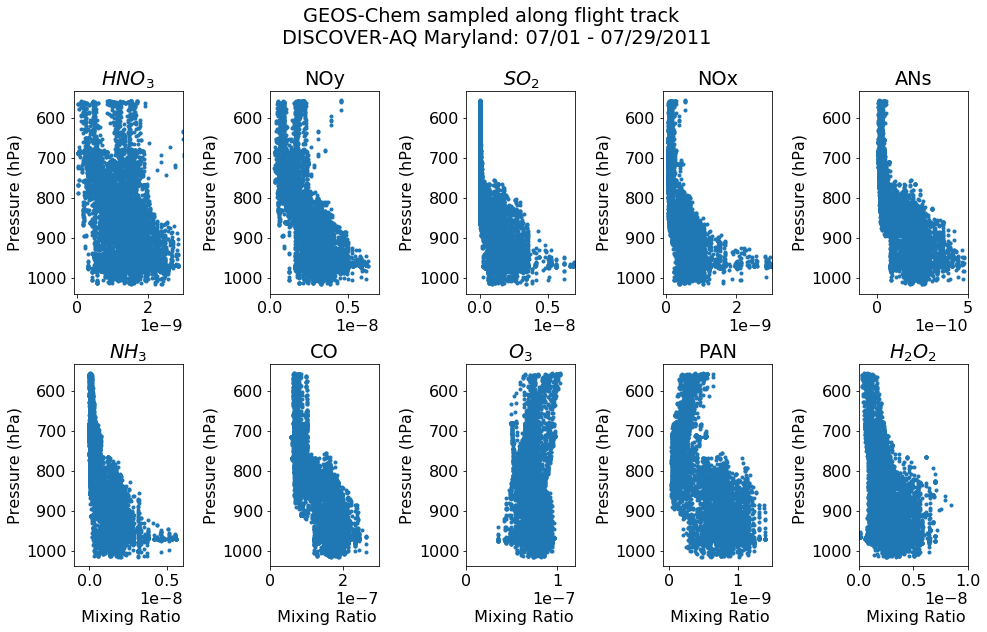

In [5]:
fig = plt.figure(figsize=[14,9])
for idx, cp in enumerate(cpdc):
    fig.add_subplot(2,5 ,idx+1)
    plt.scatter(np.ma.masked_invalid(dsc_mon[cpdc[cp]]), dsc_mon['PRESS'], marker = '.')
    plt.gca().invert_yaxis()
    
    if cp == 'HNO3':
        plt.xlim([-0.1e-9, 3.0e-9])
        plt.title(r'$HNO_3$')
    elif cp == 'SO2':
        plt.xlim([-0.1e-8, 0.7e-8])
        plt.title(r'$SO_2$')
    elif cp == 'NOx':
        plt.xlim([-0.1e-9, 3.0e-9])
        plt.title(cp)
    elif cp == 'R4N2':
        plt.xlim([-0.1e-9, 5e-10])
        plt.title('ANs')
    elif cp == 'NH3':
        plt.xlim([-0.1e-8, 0.6e-8])
        plt.title(r'$NH_3$')
    elif cp == 'CO':
        plt.xlim([0., 3.0e-7])
        plt.title(cp)
    elif cp == 'O3':
        plt.xlim([0., 1.2e-7])
        plt.title(r'$O_3$')
    elif cp == 'NOy':
        plt.xlim([0., 0.7e-8])
        plt.title(cp)
    elif cp == 'PAN':
        plt.xlim([-0.1e-9, 1.5e-9])
        plt.title(cp)
    elif cp == 'H2O2':
        plt.xlim([0., 1.0e-8])
        plt.title(r'$H_2O_2$')
    
    if idx==0 or 5:
        plt.ylabel('Pressure (hPa)')
    if idx>4:
        plt.xlabel('\n Mixing Ratio')
        
plt.suptitle('GEOS-Chem sampled along flight track \n DISCOVER-AQ Maryland: 07/01 - 07/29/2011')
plt.tight_layout()
plt.subplots_adjust(top=0.85)

## Retrieve aircraft observations

In [6]:
pdat = 'Planeflight.dat.'
odat = pd.read_csv('../../flighttracks/2011/07/' + pdat + str(dates[0]) + '.csv', sep=',', engine='python')
dsc_obm = odat[odat['campaign']=='DISCOVER-AQ-DC-WP3B']

for dt in dates:
    day_dat = 0
    dsc_day = 0
    day_dat = pd.read_csv('../../flighttracks/2011/07/' + pdat + str(dt) + '.csv', sep=',', engine='python')
    dsc_obd = day_dat[day_dat['campaign']=='DISCOVER-AQ-DC-WP3B']
    dsc_obm = pd.concat([dsc_obm, dsc_obd])

dsc_obm['ANs_TD.LIF'] = dsc_obm['ANs_TD.LIF']/1e12 # convert from ppt to MR

In [7]:
dsc_obm['VPD'] = dsc_obm['C_SatVaporPresWater'] - dsc_obm['C_VaporPresWater']
list(dsc_obm)

['ABSdry532',
 'ACLD_GIN',
 'ACLF_GIN',
 'ACLS_GIN',
 'ADC_IAS',
 'AKRD',
 'ALT_GIN',
 'ANs_TD.LIF',
 'AOA',
 'AOSS',
 'APO.X',
 'APO_AO2',
 'ATX',
 'A_CabinPressure',
 'A_DewPoint',
 'A_JNO2_Nadir',
 'A_JNO2_Zenith',
 'A_RadarAlt',
 'A_SurfTemp',
 'A_TotalTemp',
 'Abs470tot',
 'Abs532tot',
 'Abs660tot',
 'Acetaldehyde',
 'Acetic_acid',
 'Acetone',
 'Acetonitrile',
 'Ammonium',
 'Angstrom_Exponent_of_Absorption_at_450and550nm',
 'Angstrom_Exponent_of_Absorption_at_450and700nm',
 'Angstrom_Exponent_of_Scattering_at_450and550nm',
 'Angstrom_Exponent_of_Scattering_at_450and700nm',
 'BC_ng_kg',
 'BC_ng_m3',
 'BSC_BLUU',
 'BSC_GRNU',
 'BSC_REDU',
 'BTHEIM_C',
 'BTHEIM_U',
 'Bap370',
 'Bap470',
 'Bap520',
 'Bap590',
 'Bap660',
 'Bap880',
 'Bap950',
 'Baro_Altitude',
 'Bkscat450',
 'Bkscat550',
 'Bkscat700',
 'BlackCarbonMassConcentration',
 'Bscat450',
 'Bscat550',
 'Bscat700',
 'CAB_PRES',
 'CAB_TEMP',
 'CFC_113_P',
 'CFC_113e_P',
 'CFC_11_P',
 'CFC_11e_P',
 'CFC_12_P',
 'CFC_12e_P',
 'CH2O

The observations include NOx, $HNO_3$, ANs, $O_3$, CO and NOy. PAN_P, PANe_P, SO2_ppbv are empty; no $H_2O_2$ or $NH_3$. Note that ANs are in pptv and must be converted.

In [8]:
# Variables in common:
vrs = {'NOx': ['NOx', 'TRA_068'], 'HNO3': ['HNO3', 'TRA_007'], \
       'O3': ['O3', 'TRA_002'], 'ANs': ['ANs_TD.LIF', 'TRA_017'], \
       'CO': ['CO', 'TRA_004'], 'NOy': ['NOy', 'NOy']}


## Compare model and aircraft observations

### Organize data for simplified vertical profiles

In [9]:
# Calculate mean pressure over several intervals
# Observations
dsc_obm['NOx'] = dsc_obm['NO'] + dsc_obm['NO2_NCAR']
dsc_obm_s = dsc_obm.sort_values('press')
olen = len(dsc_obm_s[6:])
oprs = dsc_obm_s['press'][6:].values.reshape(8, olen/8)
mopr = np.mean(oprs, axis=1)

# Model
dsc_mon_s = dsc_mon.sort_values('PRESS')
dsc_mon_s['NOx'] = dsc_mon_s['NO'] + dsc_mon_s['NO2']
tlen = len(dsc_mon_s[4:]) # truncate to allow more pressure levels
pres = dsc_mon_s['PRESS'][4:].values.reshape(8, tlen/8)
mprs = np.mean(pres, axis=1)

### Plotting campaign mean

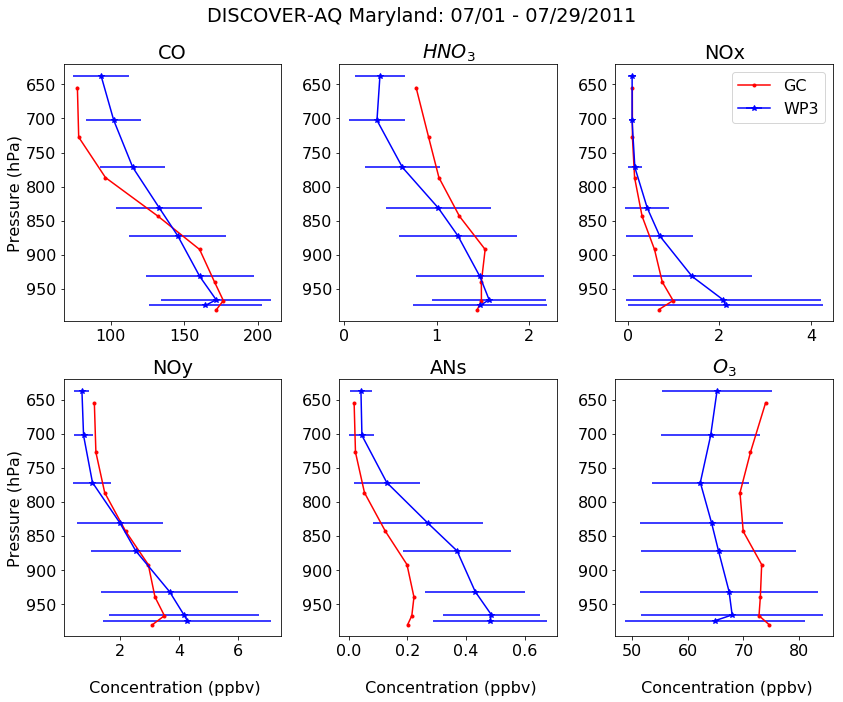

In [30]:
fig = plt.figure(figsize=[12,10])
for idx, cp in enumerate(vrs):
    fig.add_subplot(2, 3, idx+1)
    
    # Mask observations where negative in order to take interval mean
    odat = (dsc_obm_s[vrs[cp][0]][6:].values.reshape(8, olen/8)) * 1e9 # ppbv
    modt = np.ma.masked_invalid(odat) # some values also NaN
    mask = modt < 0
    modt = np.ma.masked_array(modt, mask)
    mmod = np.mean(modt, axis=1)
    osdv = np.std(modt, axis=1)
        
    # Model interval mean
    mdat = np.mean((dsc_mon_s[vrs[cp][1]][4:] * 1e9).values.reshape(8, tlen/8), axis=1) # ppbv
    #msdv = np.std(dsc_mon_s[vrs[cp][1]][4:].values.reshape(8, tlen/8), axis=1)
    
    # Plotting
    plt.errorbar(mmod, mopr, color='b', xerr=osdv, marker= '*', label='WP3')
    plt.plot(mdat, mprs, color='r', marker= '.', label='GC')
    plt.gca().invert_yaxis()
    if cp == 'HNO3':
        plt.title(r'$HNO_3$')
    elif cp == 'O3':
        plt.title(r'$O_3$')
    else:
        plt.title(cp)
    
    if idx == 0:
        plt.ylabel('Pressure (hPa)')
    elif idx == 3:
        plt.ylabel('Pressure (hPa)')
    if idx > 2:
        plt.xlabel('\n Concentration (ppbv)')
    if idx == 2:
        plt.legend(loc='best')

plt.suptitle('DISCOVER-AQ Maryland: 07/01 - 07/29/2011')
plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.savefig('disco/disco_prof.jpg')

## Subset aircraft data by meteorological observations

In [31]:
def metsub(dat, varn, cmap, desc):
    fig = plt.figure(figsize=[14,9])
    for idx, var in enumerate(vrs):
        fig.add_subplot(2,3 ,idx+1)
        met = dat[varn]
        obj = plt.scatter(np.ma.masked_invalid(dat[vrs[var][0]] * 1e9), dat['press'], c=met, cmap=cmap, marker = '.')
        plt.gca().invert_yaxis()
            
        if var=='CO':
            plt.xlim([0.5e-7, 2.5e-7])
            plt.title(var)
        elif var=='O3':
            plt.xlim([0., 1.5e-7])
            plt.title(r'$O_3$')
            #plt.colorbar(obj)
        elif var=='ANs':
            plt.xlim([-0.8e-10, 1.3e-9])
            plt.title(var)
        elif var=='HNO3':
            plt.xlim([-0.2e-9, 6e-9])
            plt.title(r'$HNO_3$')
        else:
            plt.xlim([-0.2e-9, 1.2e-8])
            plt.title(var)
            
        if idx==0 or 3:
            plt.ylabel('Pressure (hPa)')
        if idx>2:
            plt.xlabel('\n Concentration (ppbv)')
            
    cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
    fig.colorbar(obj, cax=cbar_ax)
    plt.suptitle(desc + '\n DISCOVER-AQ Maryland: 07/01 - 07/29/2011')
    plt.tight_layout()
    plt.subplots_adjust(top=0.87, right=0.9)
    return fig;

### Temperature

##### Surface Temperature

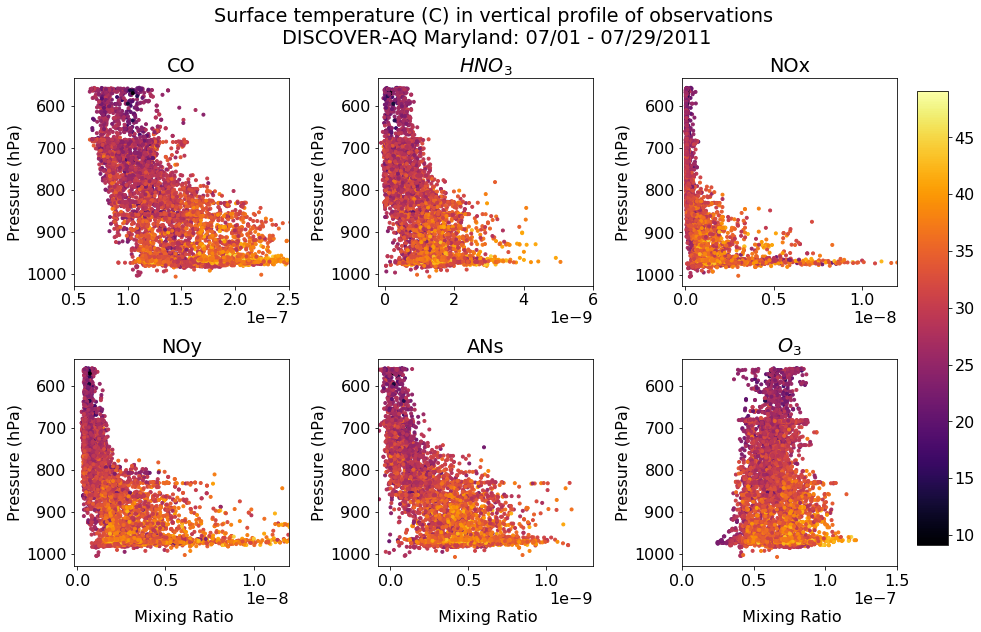

In [19]:
dsc_obm['A_SurfTemp'] = dsc_obm['A_SurfTemp'] - 273.15
st = metsub(dsc_obm, 'A_SurfTemp', 'inferno', 'Surface temperature (C) in vertical profile of observations')
plt.savefig('disco/disco_st.jpg')

##### Total Temperature

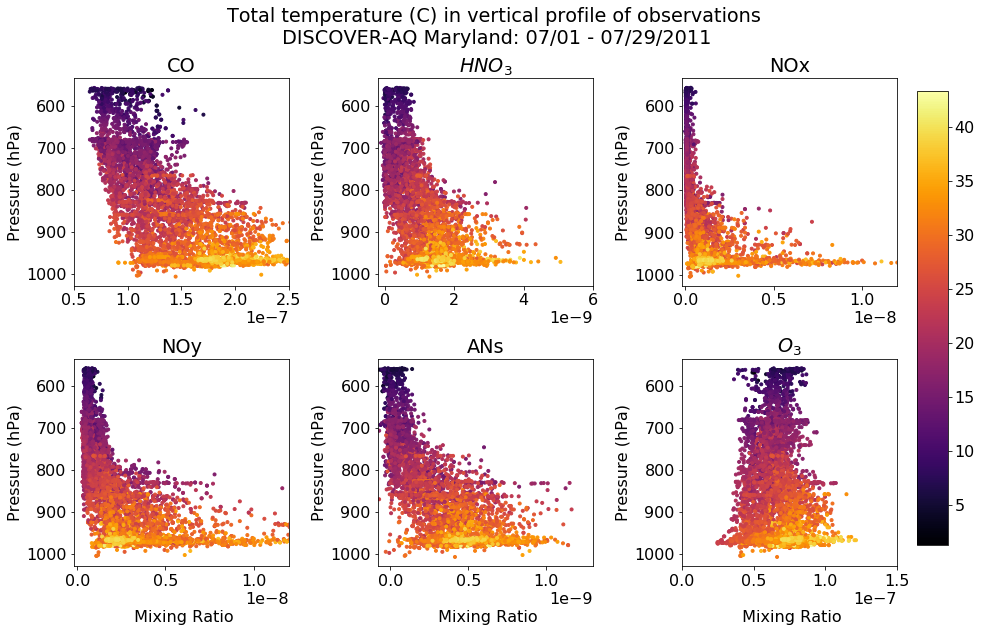

In [20]:
dsc_obm['A_TotalTemp'] = dsc_obm['A_TotalTemp'] - 273.15
tt = metsub(dsc_obm, 'A_TotalTemp', 'inferno', 'Total temperature (C) in vertical profile of observations')
plt.savefig('disco/disco_tt.jpg')

##### Dew Point

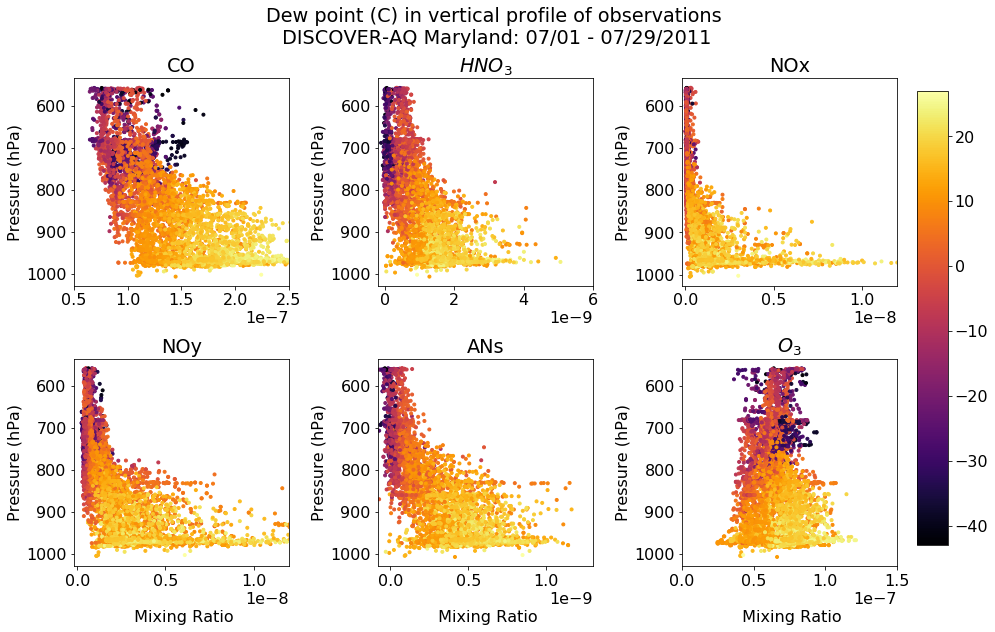

In [21]:
dsc_obm['A_DewPoint'] = dsc_obm['A_DewPoint'] - 273.15
dp = metsub(dsc_obm, 'A_DewPoint', 'inferno', 'Dew point (C) in vertical profile of observations')
plt.savefig('disco/disco_dp.jpg')

### Moisture indicators

##### Relative Humidity

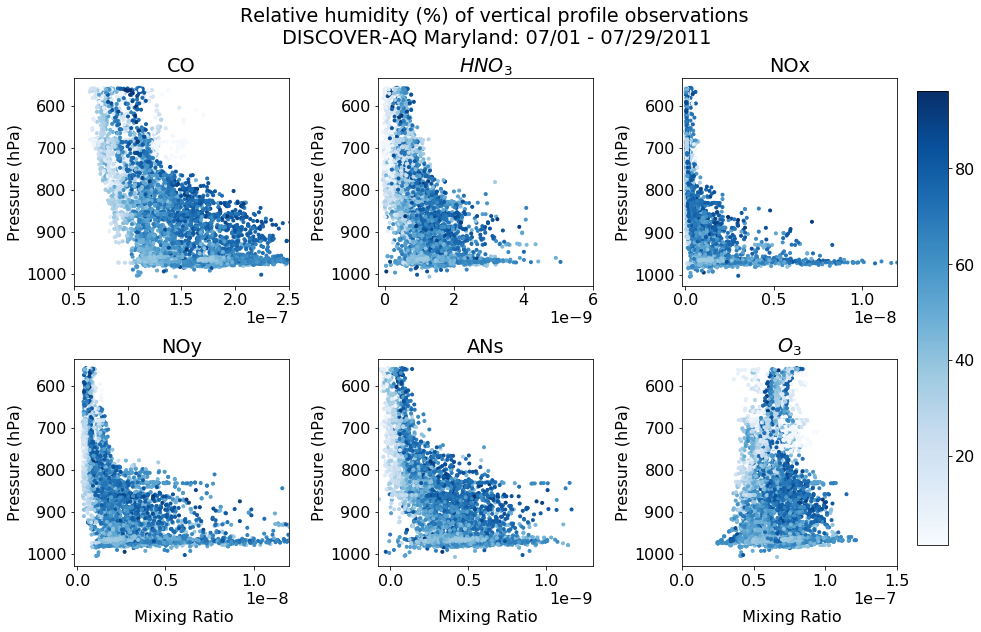

In [15]:
rh = metsub(dsc_obm, 'C_RelHumidity', 'Blues', 'Relative humidity (%) of vertical profile observations')
plt.savefig('disco/disco_rh.jpg')

##### $H_2O$ Mixing Ratio

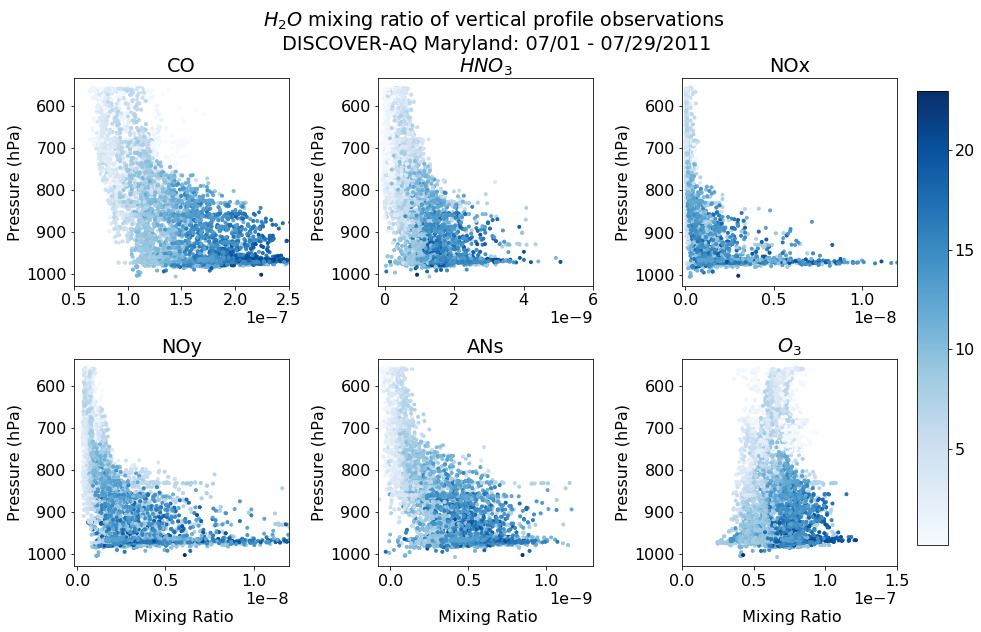

In [16]:
mr = metsub(dsc_obm, 'C_MixingRatio', 'Blues', r'$H_2O$' + ' mixing ratio of vertical profile observations')
plt.savefig('disco/disco_mr.jpg')

##### Vapor Pressure Deficit

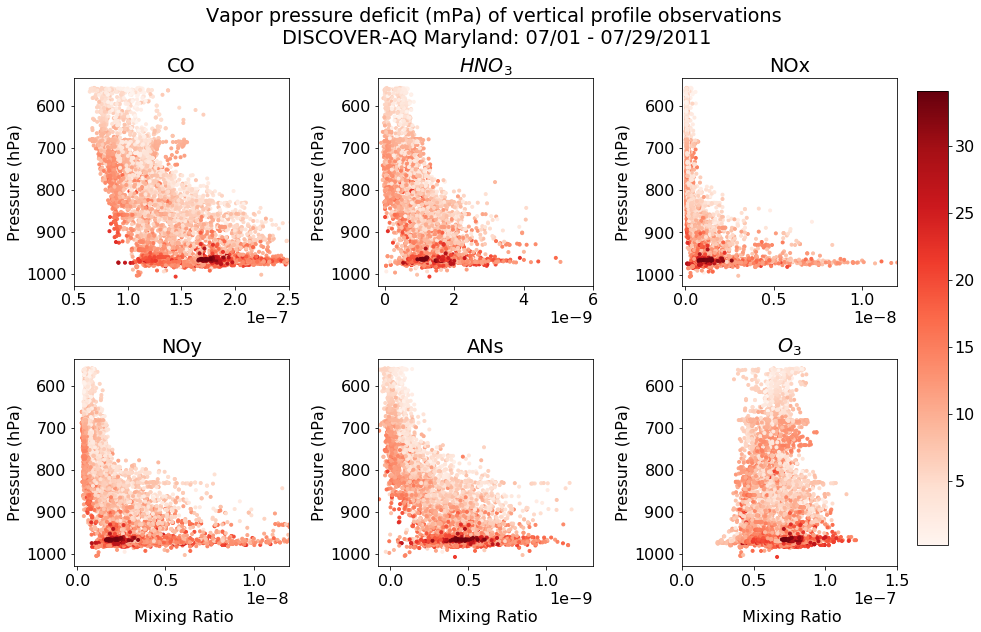

In [22]:
vp = metsub(dsc_obm, 'VPD', 'Reds', 'Vapor pressure deficit (mPa) of vertical profile observations')
plt.savefig('disco/disco_vpd.jpg')

Note that DISCOVER-AQ MD did not measure radiation variables.

### Correlate meteorological and pollutant observations

In [59]:
def metscat(datfrm, metvar, reshape_factor, title, ylab, col):
    datfrm = datfrm.sort_values(metvar)
    nlen = len(datfrm)
    met = np.ma.masked_invalid(datfrm[metvar][1:].values.reshape(nlen/reshape_factor, reshape_factor))
    mmt = np.mean(met, axis=1)
    
    fig = plt.figure(figsize=[12,9])
    for idx, val in enumerate(vrs):
        odat = (datfrm[vrs[val][0]][1:].values.reshape(nlen/reshape_factor, reshape_factor)) * 1e9 # ppbv
        modt = np.ma.masked_invalid(odat) # some values also NaN
        mask = modt < 0
        pol = np.ma.masked_array(modt, mask)

        mpl = np.mean(pol, axis=1)
        
        fig.add_subplot(3, 2, idx+1)
        if metvar=='VPD':
            plt.scatter(mpl, mmt, color=col, marker='.')
            plt.xlabel('Concentration (ppbv)')
            plt.ylim([-2,22])
        else:
            plt.scatter(np.log(mpl), mmt, color=col, marker='.')
            plt.xlabel('log(Conc.) (ppbv)')
            #if val=='SO2' or val=='NH3':
            #    plt.xlim([-8, 4])
        plt.ylabel(ylab)
        if val=='HNO3':
            plt.title(r'$HNO_3$')
        elif val=='NH3':
            plt.title(r'$NH_3$')
        elif val=='SO2':
            plt.title(r'$SO_2$')
        elif val=='O3':
            plt.title(r'$O_3$')
        else:
            plt.title(val)
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

### Temperature Indicators

##### Surface Temperature

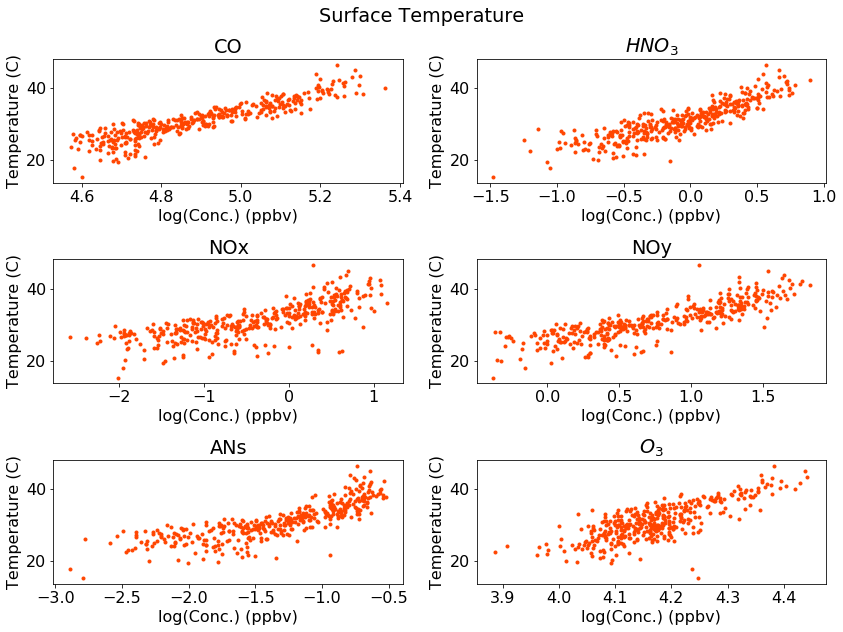

In [75]:
a = metscat(dsc_obm, 'A_SurfTemp', 17, 'Surface Temperature', 'Temperature (C)', 'orangered')

##### Total Temperature

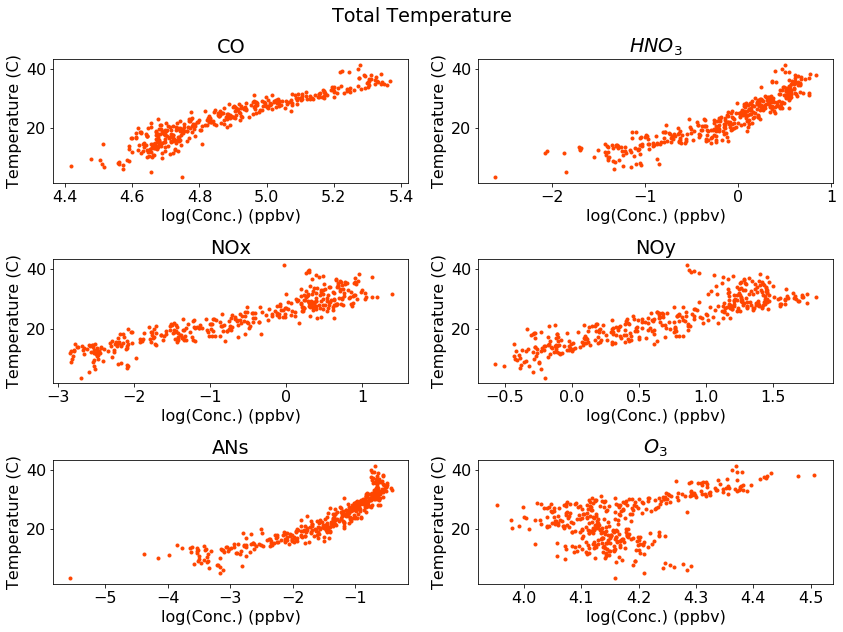

In [74]:
a = metscat(dsc_obm, 'A_TotalTemp', 17, 'Total Temperature', 'Temperature (C)', 'orangered')

##### Dew Point Temperature

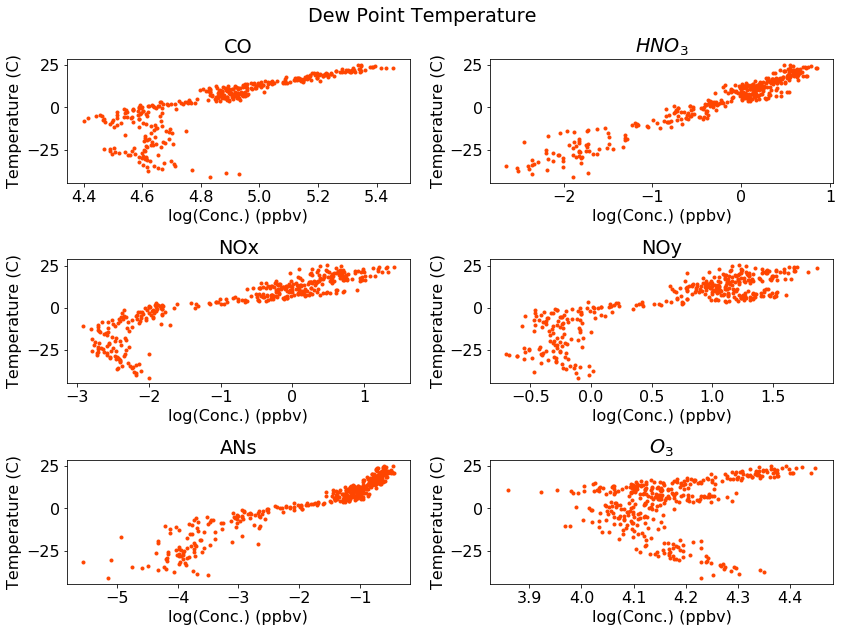

In [73]:
a = metscat(dsc_obm, 'A_DewPoint', 17, 'Dew Point Temperature', 'Temperature (C)', 'orangered')

### Moisture Indicators

##### Relative Humidity

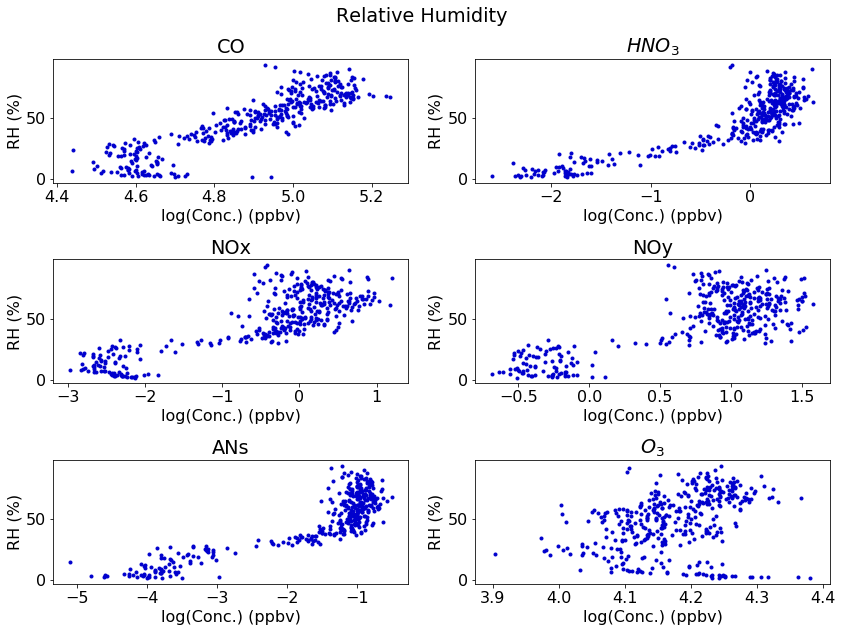

In [72]:
a = metscat(dsc_obm, 'C_RelHumidity', 17, 'Relative Humidity', 'RH (%)', 'mediumblue')

##### $H_2O$ Mixing Ratio

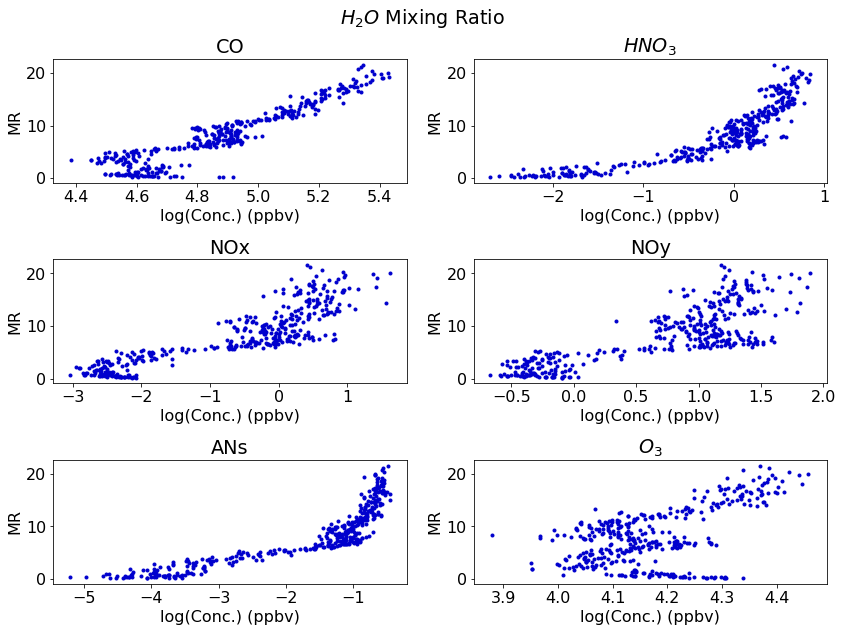

In [71]:
a = metscat(dsc_obm, 'C_MixingRatio', 17, r'$H_2O$' + ' Mixing Ratio', 'MR', 'mediumblue')

### Derived Indicators

##### Vapor Pressure Deficit

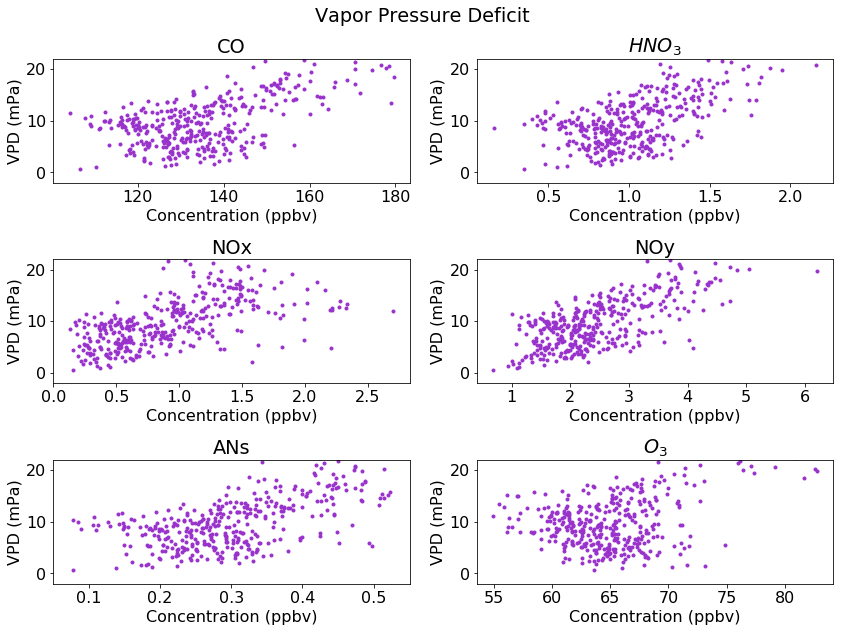

In [70]:
a = metscat(dsc_obm, 'VPD', 17, 'Vapor Pressure Deficit', 'VPD (mPa)', 'darkorchid')

##### Dew Ratio

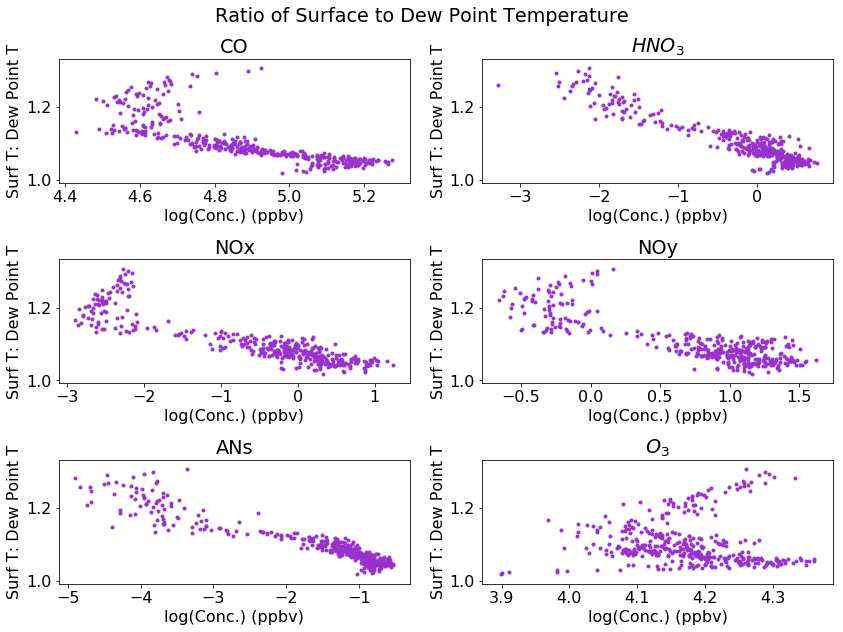

In [69]:
surfk = dsc_obm['A_SurfTemp'] + 273.15
dewpk = dsc_obm['A_DewPoint'] + 273.15
dsc_obm['DewRatio'] = surfk/dewpk
a = metscat(dsc_obm, 'DewRatio', 17, 'Ratio of Surface to Dew Point Temperature', 'Surf T: Dew Point T', 'darkorchid')

##### Dew Difference

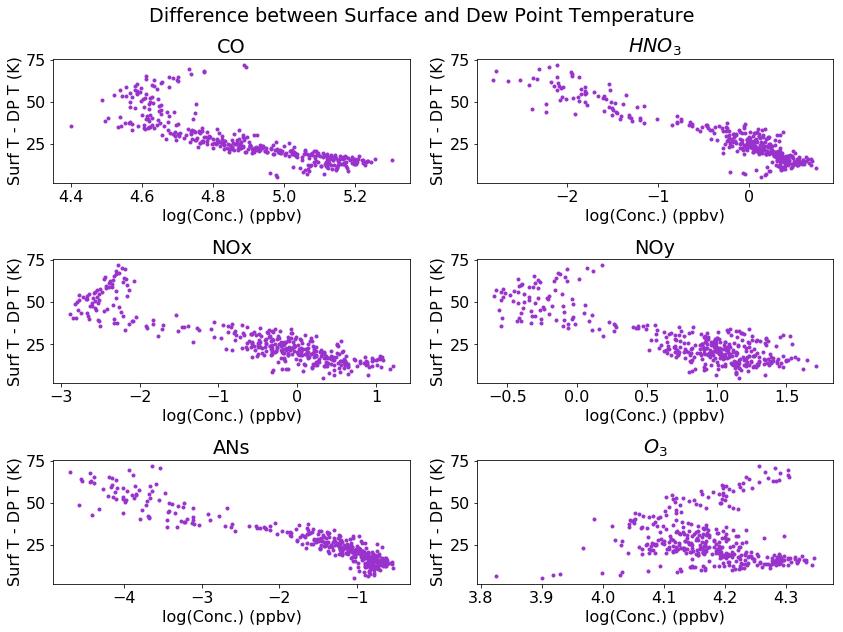

In [76]:
dsc_obm['DewDiff'] = surfk - dewpk
a = metscat(dsc_obm, 'DewDiff', 17, 'Difference between Surface and Dew Point Temperature', 'Surf T - DP T (K)', 'darkorchid')